<a href="https://colab.research.google.com/github/jsebastianquiroga/DEEP_LEARNING_UPJ/blob/main/taller_dos/traffic_sign_classification_and_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import zipfile
#import os

#files = zipfile.ZipFile('Datos.zip', 'r')
#files.extractall(os.getcwd())
#files.close()  

<h1> <strong> 2) Comprensión del dataset


• ¿Qué información presenta el dataset?

Este conjunto de datos contiene 6358 etiquetas de categorías etiquetadas manualmente. Las etiquetas incluyen las 10 categorías siguientes: `GuideSign`, `M1`, `M4`, `M5`, `M6`, `M7`, `P1`, `P10_50`, `P12`, `W1`, correspondientes a diez categorías diferentes de señales de tráfico. Todos los datos se han dividido manualmente en conjunto de entrenamiento y conjunto de prueba según la proporción.


Un muestreo aleatorio de las imagenes del dataset:

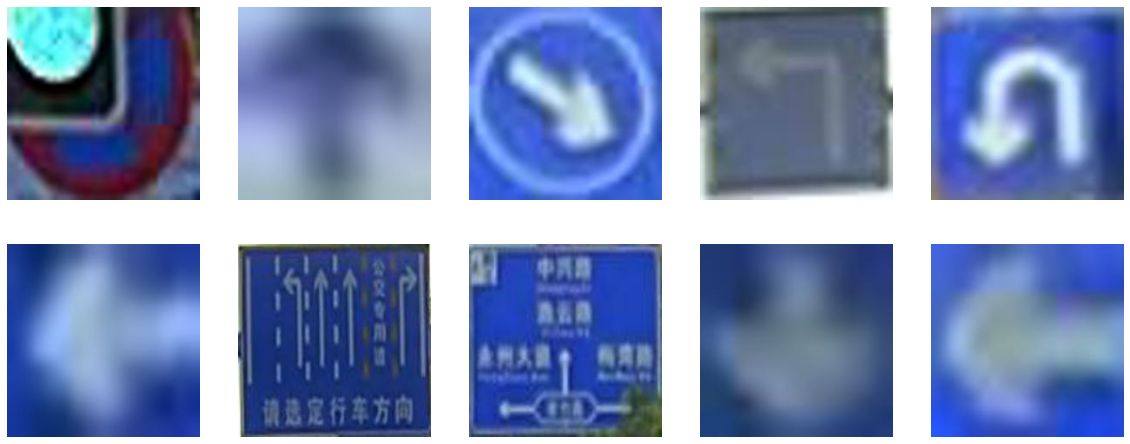

In [50]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Ruta a la carpeta principal que contiene todas las carpetas con imágenes
main_folder = 'train_dataset/train/'

# Lista de carpetas que contienen imágenes
subfolders = [f.path for f in os.scandir(main_folder) if f.is_dir()]

# Selecciona aleatoriamente 10 imágenes de las carpetas
img_list = []
for folder in subfolders:
    img_list += [os.path.join(folder, f) for f in os.listdir(folder)]
sample_imgs = random.sample(img_list, 10)

# Carga las imágenes y muestra en una cuadrícula de 2x5
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()
for i, img_path in enumerate(sample_imgs):
    img = imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()


Se identifican imagenes de transito en colores.


In [21]:
from PIL import Image
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'train_dataset/'

# Inicializa variables para contabilizar información del dataset
num_images = 0
image_sizes = set()

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Carga la imagen
            img_path = os.path.join(subdir, filename)
            img = Image.open(img_path)

            # Contabiliza el número de imágenes y sus tamaños
            num_images += 1
            image_sizes.add(img.size)

# Imprime información del dataset
print(f'Número total de imágenes: {num_images}')
print(f'Tamaños de imágenes: {image_sizes}')



Número total de imágenes: 6024
Tamaños de imágenes: {(224, 224)}


In [26]:
from PIL import Image
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'test_dataset/'

# Inicializa variables para contabilizar información del dataset
num_images = 0
image_sizes = set()

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Carga la imagen
            img_path = os.path.join(subdir, filename)
            img = Image.open(img_path)

            # Contabiliza el número de imágenes y sus tamaños
            num_images += 1
            image_sizes.add(img.size)

# Imprime información del dataset
print(f'Número total de imágenes: {num_images}')
print(f'Tamaños de imágenes: {image_sizes}')



Número total de imágenes: 324
Tamaños de imágenes: {(224, 224)}


## El conjunto de prueba se compone de 6024 imagenes y el de prueba de 324 imagenes cada una de un tamaño de 224 pixeles, analicemos los conjuntos de cada data set:

In [27]:
from PIL import Image
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'train_dataset/train/'

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa variables para contabilizar información del subdirectorio
    num_images = 0
    image_sizes = set()

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Carga la imagen
            img_path = os.path.join(subdir, filename)
            img = Image.open(img_path)

            # Contabiliza el número de imágenes y sus tamaños
            num_images += 1
            image_sizes.add(img.size)

    # Imprime información del subdirectorio
    print(f'Carpeta: {subdir}')
    print(f'Número total de imágenes: {num_images}')
    print(f'Tamaños de imágenes: {image_sizes}')


Carpeta: train_dataset/train/
Número total de imágenes: 0
Tamaños de imágenes: set()
Carpeta: train_dataset/train/GuideSign
Número total de imágenes: 1171
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M1
Número total de imágenes: 247
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M4
Número total de imágenes: 3206
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M5
Número total de imágenes: 213
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M6
Número total de imágenes: 134
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M7
Número total de imágenes: 469
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/P1
Número total de imágenes: 249
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/P10_50
Número total de imágenes: 95
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/P12
Número total de imágenes: 95
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/W1
Número 

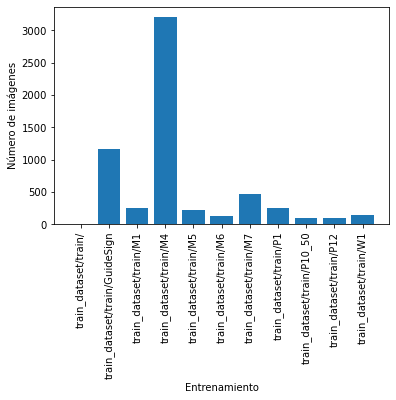

In [46]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'train_dataset/train/'

# Inicializa un diccionario para contabilizar el número de imágenes por carpeta
num_images_per_folder = {}

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa un contador de imágenes para el subdirectorio actual
    num_images = 0

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Incrementa el contador de imágenes
            num_images += 1

    # Agrega la cantidad de imágenes contabilizadas al diccionario
    num_images_per_folder[subdir] = num_images

# Genera un gráfico de barras que muestra el número de imágenes por carpeta
plt.bar(range(len(num_images_per_folder)), list(num_images_per_folder.values()), align='center')
plt.xticks(range(len(num_images_per_folder)), list(num_images_per_folder.keys()), rotation=90)
plt.xlabel('Entrenamiento')
plt.ylabel('Número de imágenes')
plt.show()


La cantidad de imagenes es casi proporcional en todos los casos excepto en las categorias Guidesign y M4

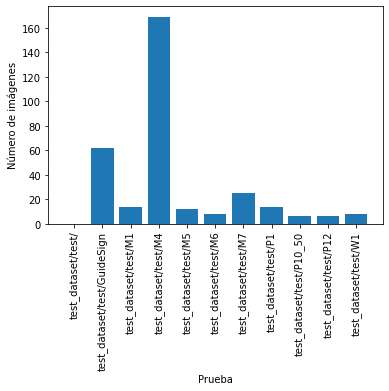

In [51]:
# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'test_dataset/test/'

# Inicializa un diccionario para contabilizar el número de imágenes por carpeta
num_images_per_folder = {}

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa un contador de imágenes para el subdirectorio actual
    num_images = 0

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Incrementa el contador de imágenes
            num_images += 1

    # Agrega la cantidad de imágenes contabilizadas al diccionario
    num_images_per_folder[subdir] = num_images

# Genera un gráfico de barras que muestra el número de imágenes por carpeta
plt.bar(range(len(num_images_per_folder)), list(num_images_per_folder.values()), align='center')
plt.xticks(range(len(num_images_per_folder)), list(num_images_per_folder.keys()), rotation=90)
plt.xlabel('Prueba')
plt.ylabel('Número de imágenes')
plt.show()


La cantidad de imagenes es casi proporcional en todos los casos excepto en las categorias Guidesign y M4

## Se identifican 10 clases de clasificación en cada uno de los dataset de entrenamiento y prueba: 


| Categoria | Descripción        |
| --------- | -----------------  |
| Guidesign | Guide sign         |
| M1        | Indicating signs   |
| M4        | lane signage       |
| M5        | vehicle road sign  |
| M6        | bicycle road sign  |
| M7        | Zebra crossing logo|
| P1        | Prohibition sign   |
| P10_50    | speed limit sign   |
| P12       | courtesy sign      |
| W1        | warning signs      |


Breve explicación de cada categoría:

| Categoría | Descripción |
| --- | --- |
| Guidesign | Refiere al diseño y la colocación de señales de tráfico para guiar y orientar a los conductores y peatones en la vía pública. |
| M1 | Señales de tráfico que indican la dirección a seguir, como flechas de dirección y señales de carril para la entrada y salida de carriles. |
| M4 | Señales de tráfico que se colocan a lo largo de los carriles de tráfico para proporcionar información específica sobre los carriles de la carretera. |
| M5 | Señales de tráfico que indican la presencia de una carretera o un camino, y las restricciones o regulaciones que se aplican a los vehículos en la misma. |
| M6 | Señales de tráfico específicas para ciclistas que indican carriles o áreas exclusivas para bicicletas. |
| M7 | Señales de tráfico que indican la presencia de un paso de peatones y que alertan a los conductores para reducir la velocidad y ceder el paso a los peatones. |
| P1 | Señales de tráfico que indican una prohibición o restricción, como una señal de "prohibido estacionarse" o una señal de "prohibido girar a la izquierda". |
| P10_50 | Señales de tráfico que indican los límites de velocidad máxima en una determinada carretera o calle. |
| P12 | Señales de tráfico que indican una cortesía o sugerencia, como una señal de "cambio de carril sugerido" o una señal de "ceda el paso". |
| W1 | Señales de tráfico que indican peligros o advertencias en la carretera, como señales de "curva peligrosa" o señales de "cruce de animales". |
